In [2]:
import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import keras
import numpy as np
import pandas as pd
from PIL import Image 
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
# Libraries for Classification and building Models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
#from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [3]:
keras.backend.set_image_data_format('channels_first')
keras.backend.image_data_format()

'channels_first'

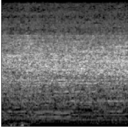

In [6]:
Image.open(r'/kaggle/input/spectrogramsurban/spectrograms/4/77774-4-0-2.png').resize((128,128)).convert('L')


In [7]:
img1 = Image.open(r'/kaggle/input/spectrogramsurban/spectrograms/4/77774-4-0-2.png')

In [8]:
img2 = Image.open(r'/kaggle/input/spectrogramsurban/spectrograms/4/77774-4-0-1.png')


In [9]:
img1.size #

(500, 374)

In [10]:
img2.size

(500, 374)

In [11]:
import os
X_data = []
Y_data = []

for dirname, _, filenames in tqdm(os.walk('/kaggle/input/spectrogramsurban/spectrograms')):
    for filename in filenames:
        img_name = os.path.join(dirname, filename)
        class_name = img_name.split('/')[5]
        #print(img_name,class_name)
        #temp = img.open(img_name).resize((30,)).convert('L')
        basewidth = 30
        img = Image.open(img_name).convert('L')
        wpercent = (basewidth/float(img.size[0]))
        hsize = int((float(img.size[1])*float(wpercent)))
        temp = img.resize((basewidth,hsize), Image.ANTIALIAS)
        X_data.append((np.array(temp) - np.mean(temp)) / np.std(temp))
        Y_data.append(class_name)

0it [00:00, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  from ipykernel import kernelapp as app
11it [01:30,  8.27s/it]


In [12]:
a = np.asarray(X_data)
X_data = a.reshape(a.shape[0],1, a.shape[1], a.shape[2])

In [13]:
a.shape

(8732, 22, 30)

In [14]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_data = to_categorical(Y_data)

In [15]:
Y_data.shape

(8732, 10)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_p,Y_train, Y_p = train_test_split(X_data, Y_data, test_size = 0.2, random_state=2)

In [17]:
print(X_train.shape,Y_train.shape)

(6985, 1, 22, 30) (6985, 10)


In [18]:
X_val, X_test, Y_val, Y_test = train_test_split(X_p, Y_p, test_size = 0.5, random_state=2)

In [19]:
print("X_train shape",X_train.shape)
print("Y_train shape",Y_train.shape)
print("X_test shape",X_test.shape)
print("Y_test shape",Y_test.shape)
print("X_val shape",X_val.shape)
print("Y_val shape",Y_val.shape)

X_train shape (6985, 1, 22, 30)
Y_train shape (6985, 10)
X_test shape (874, 1, 22, 30)
Y_test shape (874, 10)
X_val shape (873, 1, 22, 30)
Y_val shape (873, 10)


In [20]:
np.save('X_train.npy',X_train)
np.save('Y_train.npy',Y_train)
np.save('X_test.npy',X_test)
np.save('Y_test.npy',Y_test)
np.save('X_val.npy',X_val)
np.save('Y_val.npy',Y_val)

In [ ]:
#np.save('temp.npy',data)